In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from glob import glob

In [3]:
def read_xy(path: str):
    df = pd.read_csv(path)
    df['N'] = df.index + 1
    df['r'] = (df.x ** 2 + df.y ** 2) ** 0.5
    df['cr'] = df.r.cummax()
    df['fd'] = np.log(df.N) / np.log(df.cr)

    return df

In [68]:
def read_all(load_dir: str):
    paths = glob(f'{load_dir}/*.csv')
    return [read_xy(path) for path in paths]

In [69]:
a = read_xy("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/minimal-viable-alteration/1-1000.csv")
a

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


x   y     N          r         cr        fd
0     0   0     1   0.000000   0.000000 -0.000000
1    -1   0     2   1.000000   1.000000       inf
2    -2   0     3   2.000000   2.000000  1.584963
3     1   0     4   1.000000   2.000000  2.000000
4    -3   0     5   3.000000   3.000000  1.464974
..   ..  ..   ...        ...        ...       ...
995 -18  -4   996  18.439089  54.120237  1.729739
996 -47 -19   997  50.695167  54.120237  1.729990
997  -3  20   998  20.223748  54.120237  1.730241
998 -40  14   999  42.379240  54.120237  1.730492
999  35  -3  1000  35.128336  54.120237  1.730743

[1000 rows x 6 columns]

In [70]:
dfs = read_all('/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/minimal-viable-alteration')

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

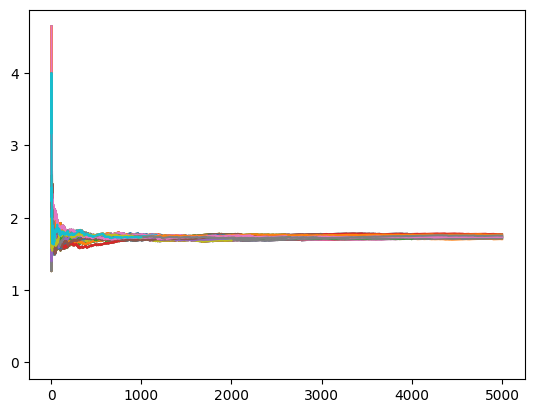

In [71]:
for df in dfs:
    plt.plot(df.N, df.fd)

plt.show()

In [120]:
def convergent_tail_index(series, tol):
    diffs = np.abs(np.ediff1d(series))
    for i in range(0, len(diffs)):
        if np.max(diffs[i:]) <= tol:
            return i

    # No convergence found
    return None

In [126]:
def compute_fd(df, tol = 0.05):
    tail_index = convergent_tail_index(df.fd, tol)
    return np.mean(df.fd[tail_index:]), np.std(df.fd[tail_index:])

In [131]:
fds = [compute_fd(df, 0.001) for df in dfs]
fds_clean = [f for f in fds if f[0] < np.inf]

In [137]:
means, stds = list(zip(*fds_clean))

In [140]:
np.mean(means), np.std(means)

(1.7311567309540636, 0.020648406595153657)

In [4]:
data = read_xy("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/minimal-viable-alteration/2-5000.csv")

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
data.r

x   y     N           r          cr        fd
0       0   0     1    0.000000    0.000000 -0.000000
1       0  -1     2    1.000000    1.000000       inf
2      -1   0     3    1.000000    1.000000       inf
3      -1   1     4    1.414214    1.414214  4.000000
4       0  -2     5    2.000000    2.000000  2.321928
...   ...  ..   ...         ...         ...       ...
4995   48  77  4996   90.735880  137.931142  1.728601
4996  -12  84  4997   84.852814  137.931142  1.728642
4997  -33  83  4998   89.319651  137.931142  1.728682
4998 -118  20  4999  119.682914  137.931142  1.728723
4999  132 -29  5000  135.148067  137.931142  1.728763

[5000 rows x 6 columns]